In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from helpers.plot_helpers import *
from helpers.computational_tools import *
%load_ext autoreload
%autoreload 3
import warnings
warnings.filterwarnings("ignore")

In [2]:
from helpers.collection_of_experiments import *

In [3]:
ds = CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/Feb2022/bare', additional_subfolder='output')
ds += CollectionOfExperiments.init_folder('/home/ctrsp-2024/pp2681/experiments/generalization', additional_subfolder='output')

In [4]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR)

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8


In [5]:
for RR in ['R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8']:
    ds.remesh('R64', RR, operator=gaussian_remesh, FGR=np.sqrt(6), exp=f'R64_{RR}_FGR-sqrt6')

Experiment R64 coarsegrained to R2 is created. Its identificator=R64_R2_FGR-sqrt6
Experiment R64 coarsegrained to R3 is created. Its identificator=R64_R3_FGR-sqrt6
Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR-sqrt6
Experiment R64 coarsegrained to R5 is created. Its identificator=R64_R5_FGR-sqrt6
Experiment R64 coarsegrained to R6 is created. Its identificator=R64_R6_FGR-sqrt6
Experiment R64 coarsegrained to R7 is created. Its identificator=R64_R7_FGR-sqrt6
Experiment R64 coarsegrained to R8 is created. Its identificator=R64_R8_FGR-sqrt6


In [6]:
for RR in ['R2', 'R4', 'R5', 'R6', 'R7', 'R8']:
    for file in [f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part1.nc', 
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part2.nc',
                 f'/home/ctrsp-2024/pp2681/notebooks/filtered-data/R64_{RR}_FGR-sqrt6-part3.nc']:
            dataset = xr.open_dataset(file, decode_times=False)
            for key in dataset.keys():
                var = dataset[key]
                var['Time'] = ds['R64'].u['Time']
                setattr(ds[f'R64_{RR}_FGR-sqrt6'], key, var)

In [8]:
RR = 'R8'
exp = ds[f'R64_{RR}_FGR-sqrt6']
SGS_transfer = exp.transfer(exp.SGSx, exp.SGSy)
SGS_CA_transfer = exp.transfer(exp.SGS_CAu, exp.SGS_CAv)


KeyboardInterrupt



In [ ]:
# Dynamic models in the same square as SGS transfer
DbSM_no_clip = exp.dynamic_model(ssm=False, reynolds=False, clip=False)
DbSM_clip = exp.dynamic_model(ssm=False, reynolds=False, clip=True)

DbMM_no_clip = exp.dynamic_model(ssm=True, reynolds=False, clip=False)
DbMM_clip = exp.dynamic_model(ssm=True, reynolds=False, clip=True)

DbMM_Reynolds_no_clip = exp.dynamic_model(ssm=True, reynolds=True, clip=False, SGS_CAu = exp.SGS_CAu, SGS_CAv = exp.SGS_CAv)
DbMM_Reynolds_clip = exp.dynamic_model(ssm=True, reynolds=True, clip=True)

In [ ]:
SGS_dict = {}
for key in ['DbSM_no_clip', 'DbSM_clip', 'DbMM_no_clip', 'DbMM_clip', 'DbMM_Reynolds_no_clip', 'DbMM_Reynolds_clip']:
    %time SGS_dict[key] = exp.transfer(eval(key)['dudt'], eval(key)['dvdt']).compute()

In [ ]:
%time SGS_dict['optimal'] = exp.transfer(DbMM_Reynolds_no_clip['dudt_opt'], DbMM_Reynolds_no_clip['dvdt_opt']).compute()

In [ ]:
Cs = {}
CR = {}
for key in ['DbSM_no_clip', 'DbSM_clip', 'DbMM_no_clip', 'DbMM_clip', 'DbMM_Reynolds_no_clip', 'DbMM_Reynolds_clip']:
    %time Cs[key] = eval(key)['Cs'].compute()
    %time CR[key] = eval(key)['CR'].compute()

In [ ]:
%time Cs['optimal'] = DbMM_Reynolds_no_clip['Cs_opt'].compute()
%time CR['optimal'] = DbMM_Reynolds_no_clip['CR_opt'].compute()

In [ ]:
DbSM

In [139]:
def Cs_string(key, zl=0, Averaging_time = slice(3650,7300)):
    series = Cs[key].isel(zl=zl).sel(Time=Averaging_time)
    mean = float(series.mean())
    std = float(series.std())
    #return "$C_S=%.3f\pm%.3f$" % (mean ,std)
    return "$C_S=%.3f$" % (mean)

def CR_string(key, zl=0, Averaging_time = slice(3650,7300)):
    series = CR[key].isel(zl=zl).sel(Time=Averaging_time)
    mean = float(series.mean())
    std = float(series.std())
    #return "$C_R=%.1f\pm%.1f$" % (mean ,std)
    return "$C_R=%.1f$" % (mean)

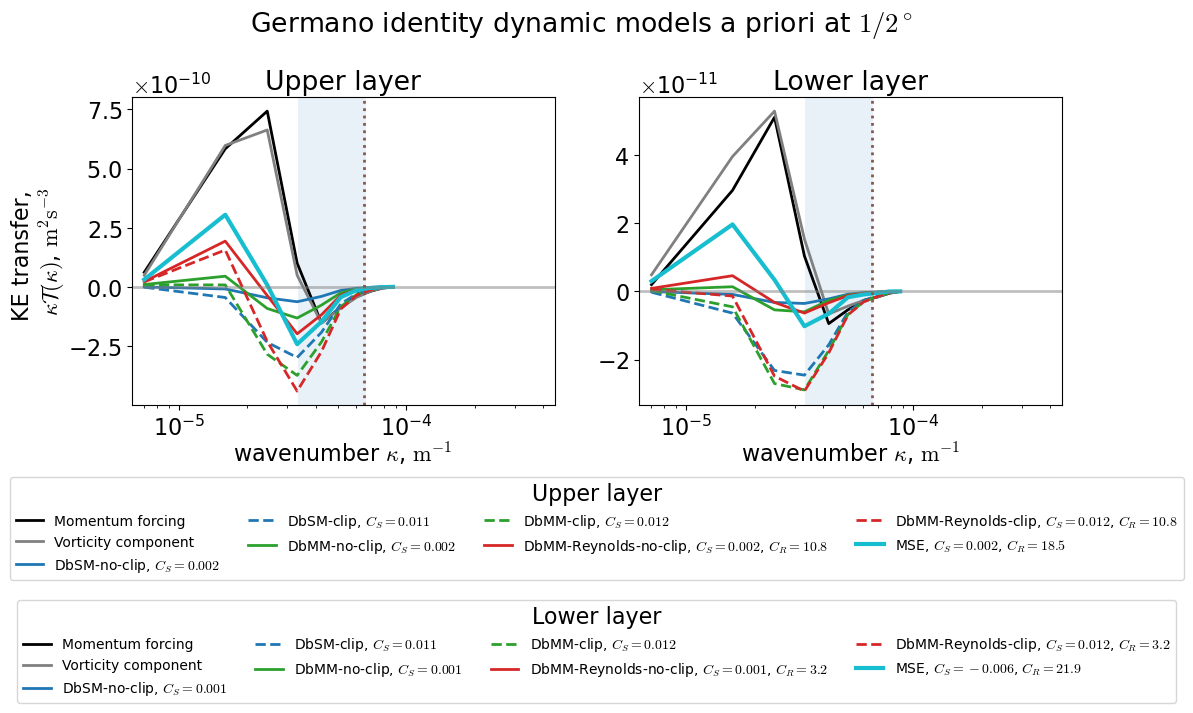

In [141]:
def compensated(sp):
    return sp * sp.freq_r

default_rcParams({'font.size':16, 'figure.subplot.wspace': 0.2, 'figure.subplot.hspace': 0.15})
zl=0
fig = plt.figure(figsize=(12,4))

colors = [
    'tab:blue',
    'tab:orange',
    'tab:green',
    'tab:red',
    'tab:purple',
    'tab:brown',
    'tab:pink',
    'tab:gray',
    'tab:olive',
    'tab:cyan'
]

for zl in [0,1]:
    plt.subplot(1,2,1+zl)
    compensated(SGS_transfer).isel(zl=zl).plot(color='k', lw=2, label='Momentum forcing')
    compensated(SGS_CA_transfer).isel(zl=zl).plot(color='gray', lw=2, label='Vorticity component')
    compensated(SGS_dict['DbSM_no_clip']).isel(zl=zl).plot(lw=2, color=colors[0], 
                label='DbSM-no-clip, %s' % Cs_string('DbSM_no_clip',zl=zl))
    compensated(SGS_dict['DbSM_clip']).isel(zl=zl).plot(lw=2, ls = '--', color=colors[0], 
                label='DbSM-clip, %s' % Cs_string('DbSM_clip',zl=zl))
    compensated(SGS_dict['DbMM_no_clip']).isel(zl=zl).plot(lw=2, color=colors[2], 
                label='DbMM-no-clip, %s' % Cs_string('DbMM_no_clip', zl=zl))
    compensated(SGS_dict['DbMM_clip']).isel(zl=zl).plot(lw=2, ls = '--', color=colors[2],
                label='DbMM-clip, %s' % Cs_string('DbMM_clip',zl=zl))
    compensated(SGS_dict['DbMM_Reynolds_no_clip']).isel(zl=zl).plot(lw=2, color=colors[3],
                label='DbMM-Reynolds-no-clip, %s, %s' % (Cs_string('DbMM_Reynolds_no_clip',zl=zl), CR_string('DbMM_Reynolds_no_clip',zl=zl)))
    compensated(SGS_dict['DbMM_Reynolds_clip']).isel(zl=zl).plot(lw=2, ls = '--', color=colors[3], 
                label='DbMM-Reynolds-clip, %s, %s' % (Cs_string('DbMM_Reynolds_clip',zl=zl), CR_string('DbMM_Reynolds_clip',zl=zl)))
    compensated(SGS_dict['optimal']).isel(zl=zl).plot(lw=3, ls = '-', color=colors[9], 
                label='MSE, %s, %s' % (Cs_string('optimal',zl=zl), CR_string('optimal',zl=zl)))


    plt.axhline(y=0,color='gray', alpha=0.5, lw=2)
    Rd1 = 30000
    Rd2 = 15000
    plt.axvspan(1/Rd1, 1/Rd2, color='tab:blue', alpha=0.1, lw=0)
    plt.xscale('log')
    plt.xlabel('')
    dx = len(ds['R64'].h.xh) / len(exp.h.xh) * 1500 # in metres
    plt.xlim([None, 4.5e-4])
    #plt.xticks([1e-5, 1e-4, 1e-3])
    plt.xlabel('wavenumber $\kappa$, $\mathrm{m}^{-1}$')


    if zl==0:
        plt.ylabel('KE transfer, \n$\kappa \mathcal{T}(\kappa)$, $\mathrm{m}^2\mathrm{s}^{-3}$')
        plt.title('Upper layer')
        #plt.ylim([-0.5e-9,0.5e-9])
        #plt.yticks(np.linspace(-1e-9,1e-9,5))
        plt.axvline(x=np.pi/dx, ls=':', color='tab:brown', lw=2)
    else:
        #plt.ylim([-0.5e-10,0.5e-10])
        #plt.yticks(np.linspace(-1e-10,1e-10,5))
        plt.axvline(x=np.pi/dx, ymin=0.0, ls=':', color='tab:brown', lw=2)
        plt.title('Lower layer')
        #plt.text(3.3e-5,-1.2e-10,'Deformation \n     radius \n  $15-30$ km', fontsize=12, color='tab:blue')
        #plt.text(np.pi/dx, -1.2e-10, 'Grid scale\n   $\\pi/\\Delta x$', fontsize=12, color='tab:brown')

    if zl==0:
        plt.legend(bbox_to_anchor=(1.1,-0.4), loc='center', ncol=4, fontsize=10, title='Upper layer')
    else:
        plt.legend(bbox_to_anchor=(-0.1,-0.8), loc='center', ncol=4, fontsize=10, title='Lower layer')
plt.suptitle('Germano identity dynamic models a priori at $1/2^\circ$', y=1.1)
plt.savefig('figures/offline_transfer_R2_GID.pdf')

In [205]:
def R2(test, target, Averaging_time = slice(3650,7300)):
    ave = lambda x: x.sel(Time = Averaging_time).mean('Time')
    error = (test-target)

    return 1 - ave(error**2) / (ave(target**2) - ave(target)**2)

In [215]:
r2 = 0.5 * (remesh(R2(DbMM_Reynolds_clip['dudt'], exp.SGS_CAu), exp.h) + remesh(R2(DbMM_Reynolds_clip['dvdt'], exp.SGS_CAv), exp.h)).compute()
r2_ssm = 0.5 * (remesh(R2(DbMM_clip['dudt'], exp.SGS_CAu), exp.h) + remesh(R2(DbMM_clip['dvdt'], exp.SGS_CAv), exp.h)).compute()
r2_smag = 0.5 * (remesh(R2(DbSM_clip['dudt'], exp.SGS_CAu), exp.h) + remesh(R2(DbSM_clip['dvdt'], exp.SGS_CAv), exp.h)).compute()

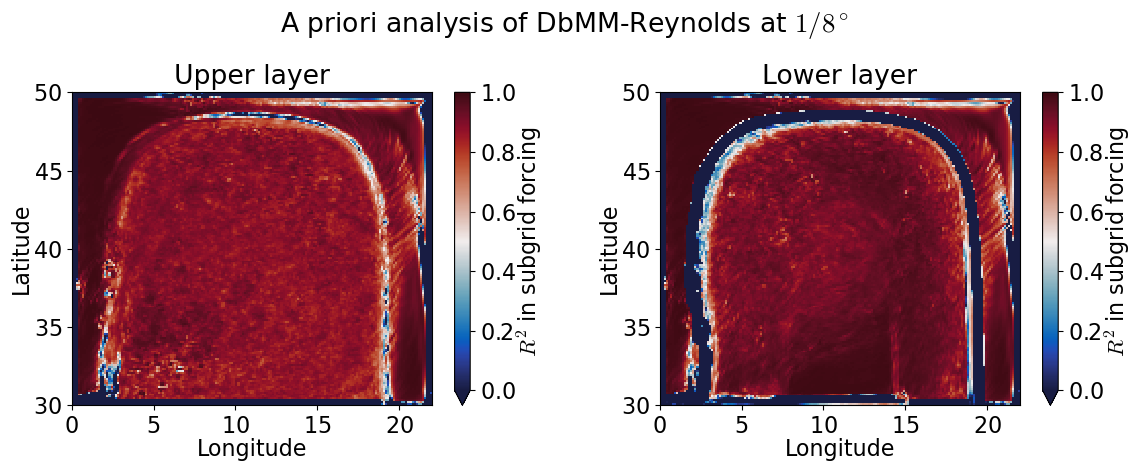

In [217]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
r2.isel(zl=0).plot(vmax=1, vmin=0, cmap=cmocean.cm.balance, cbar_kwargs={'label': '$R^2$ in subgrid forcing'})
plt.title('Upper layer')
plt.subplot(1,2,2)
r2.isel(zl=1).plot(vmax=1, vmin=0, cmap=cmocean.cm.balance, cbar_kwargs={'label': '$R^2$ in subgrid forcing'})
plt.title('Lower layer')

plt.suptitle('A priori analysis of DbMM-Reynolds at $1/8^\circ$', y=0.95)

plt.tight_layout()

plt.savefig('figures/R_squared_R8', dpi=150)

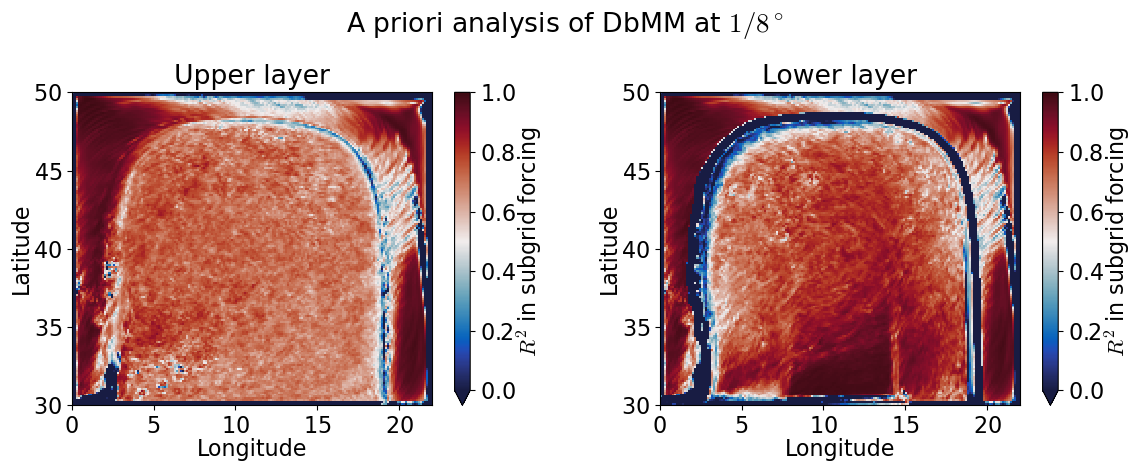

In [219]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
r2_ssm.isel(zl=0).plot(vmax=1, vmin=0, cmap=cmocean.cm.balance, cbar_kwargs={'label': '$R^2$ in subgrid forcing'})
plt.title('Upper layer')
plt.subplot(1,2,2)
r2_ssm.isel(zl=1).plot(vmax=1, vmin=0, cmap=cmocean.cm.balance, cbar_kwargs={'label': '$R^2$ in subgrid forcing'})
plt.title('Lower layer')

plt.suptitle('A priori analysis of DbMM at $1/8^\circ$', y=0.95)

plt.tight_layout()

plt.savefig('figures/R_squared_R8_ssm', dpi=150)

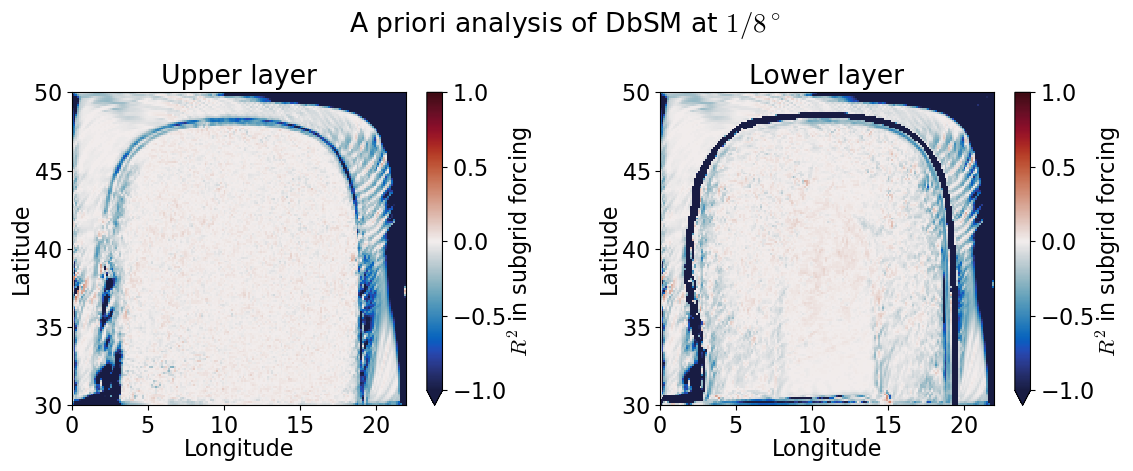

In [221]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
r2_smag.isel(zl=0).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, cbar_kwargs={'label': '$R^2$ in subgrid forcing'})
plt.title('Upper layer')
plt.subplot(1,2,2)
r2_smag.isel(zl=1).plot(vmax=1, vmin=-1, cmap=cmocean.cm.balance, cbar_kwargs={'label': '$R^2$ in subgrid forcing'})
plt.title('Lower layer')

plt.suptitle('A priori analysis of DbSM at $1/8^\circ$', y=0.95)

plt.tight_layout()

plt.savefig('figures/R_squared_R8_smag', dpi=150)

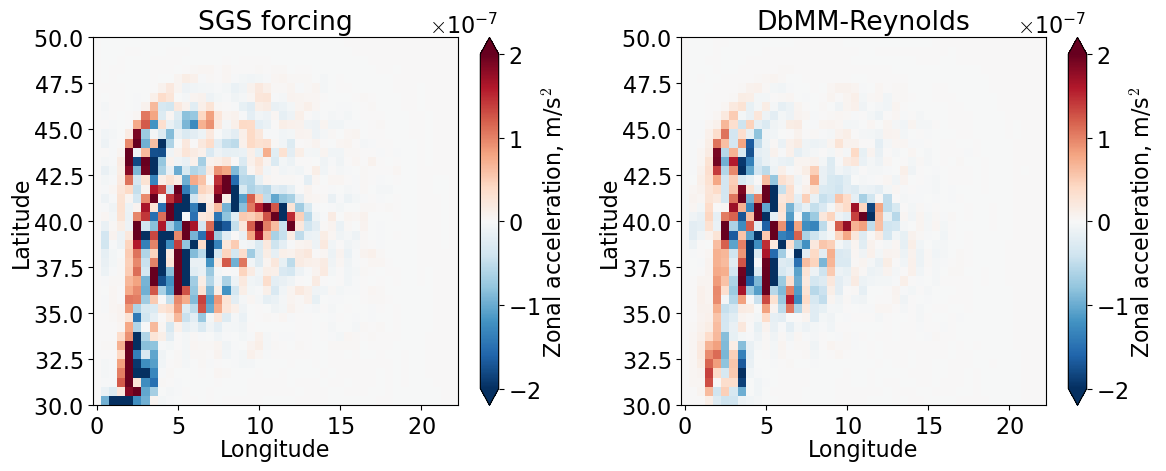

In [209]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
exp.SGS_CAu.isel(zl=0,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Zonal acceleration, m/s$^2$'})
plt.title('SGS forcing')
plt.subplot(1,2,2)
DbMM_Reynolds_clip['dudt'].isel(zl=0,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Zonal acceleration, m/s$^2$'})
plt.title('DbMM-Reynolds')

plt.tight_layout()
plt.savefig('figures/SGSx_R2', dpi=150)

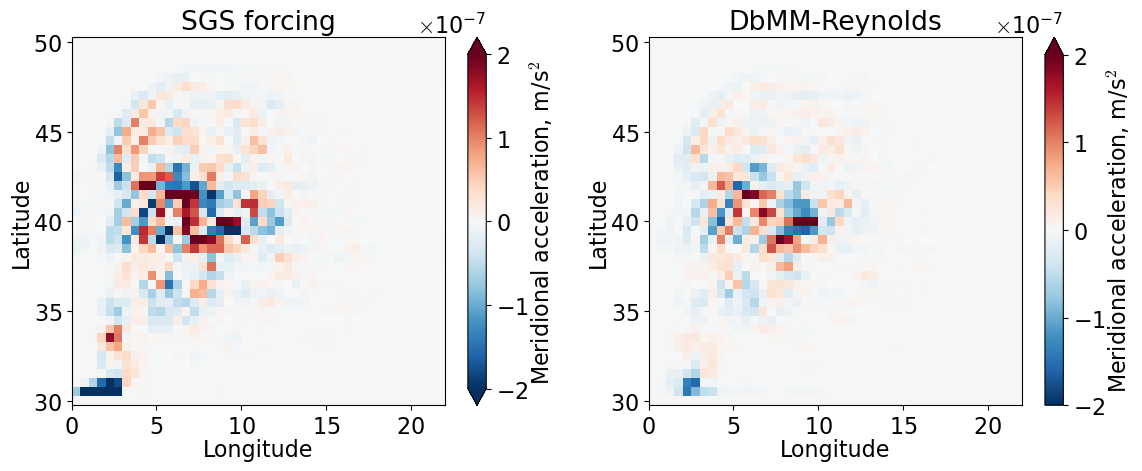

In [210]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
exp.SGS_CAv.isel(zl=0,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Meridional acceleration, m/s$^2$'})
plt.title('SGS forcing')
plt.subplot(1,2,2)
DbMM_Reynolds_clip['dvdt'].isel(zl=0,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Meridional acceleration, m/s$^2$'})
plt.title('DbMM-Reynolds')

plt.tight_layout()
plt.savefig('figures/SGSy_R2', dpi=150)

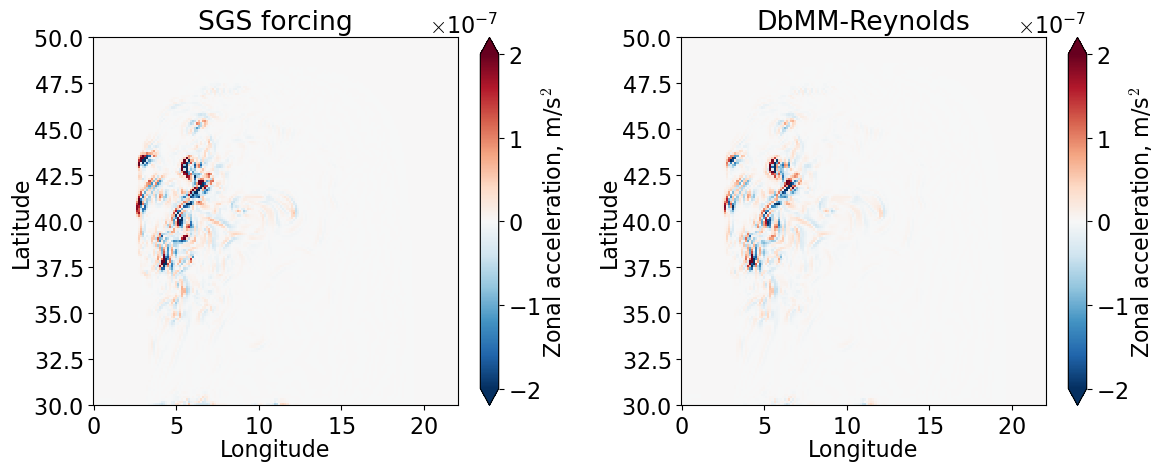

In [182]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
exp.SGS_CAu.isel(zl=1,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Zonal acceleration, m/s$^2$'})
plt.title('SGS forcing')
plt.subplot(1,2,2)
DbMM_Reynolds_clip['dudt'].isel(zl=1,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Zonal acceleration, m/s$^2$'})
plt.title('DbMM-Reynolds')

plt.tight_layout()

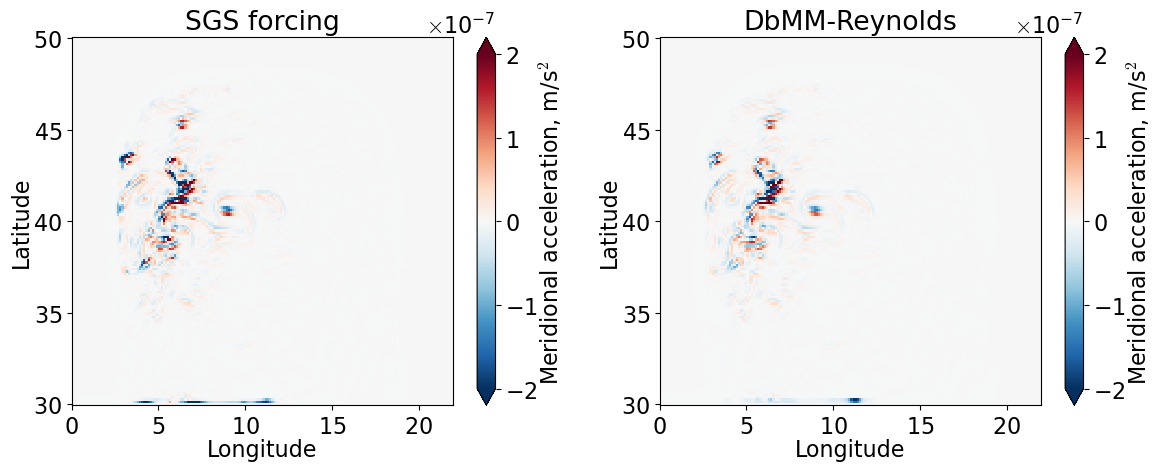

In [185]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
exp.SGS_CAv.isel(zl=1,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Meridional acceleration, m/s$^2$'})
plt.title('SGS forcing')
plt.subplot(1,2,2)
DbMM_Reynolds_clip['dvdt'].isel(zl=1,Time=-1).plot(vmin=-2e-7, cbar_kwargs={'label': 'Meridional acceleration, m/s$^2$'})
plt.title('DbMM-Reynolds')

plt.tight_layout()

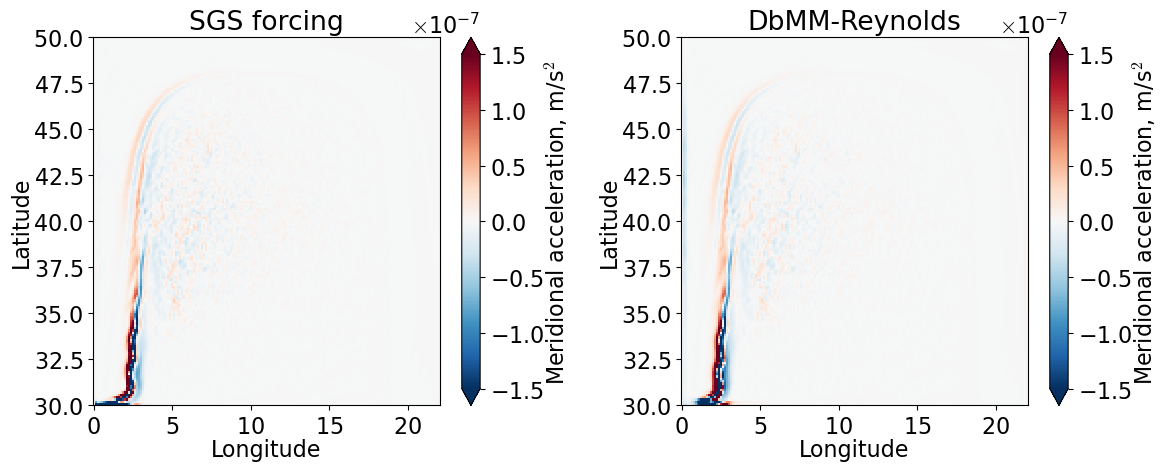

In [214]:
import cmocean
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
exp.SGS_CAu.isel(zl=0).sel(Time=slice(3650,None)).mean('Time').plot(vmin=-1.5e-7, cbar_kwargs={'label': 'Meridional acceleration, m/s$^2$'})
plt.title('SGS forcing')
plt.subplot(1,2,2)
DbMM_Reynolds_clip['dudt'].isel(zl=0).sel(Time=slice(3650,None)).mean('Time').plot(vmin=-1.5e-7, cbar_kwargs={'label': 'Meridional acceleration, m/s$^2$'})
plt.title('DbMM-Reynolds')

plt.tight_layout()

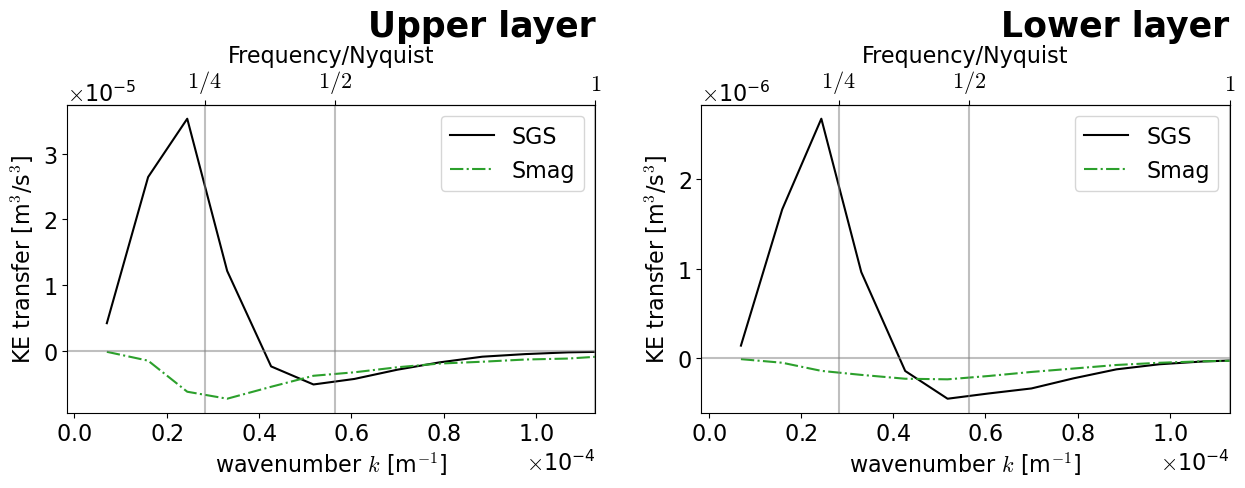

In [7]:
ds.plot_transfer('zelong-False-ssm-False-reduce-1-R4', target='R64_R4_FGR-sqrt6', callback=False)

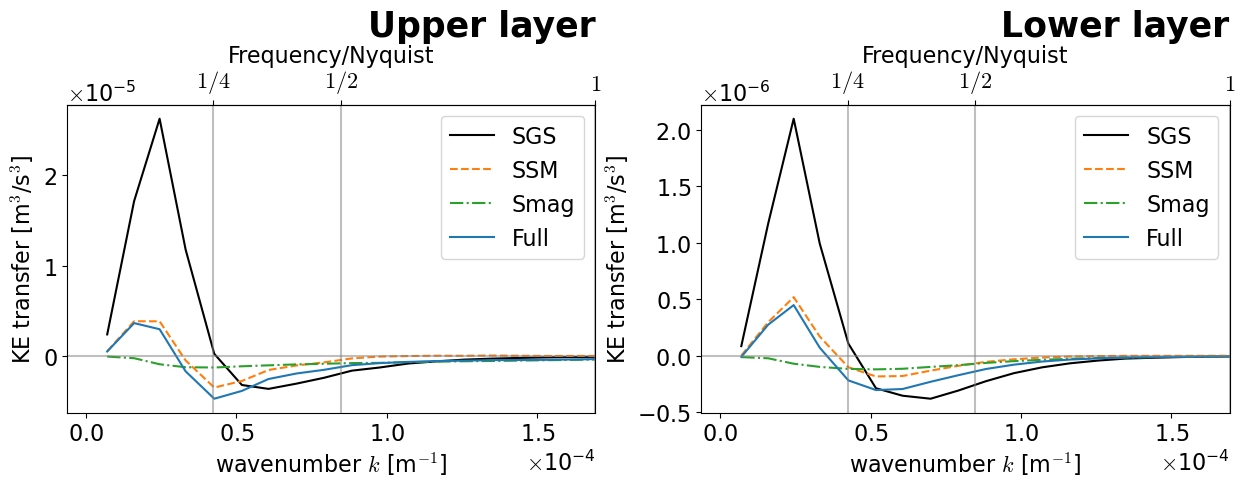

In [13]:
ds.plot_transfer('zelong-True-ssm-True-reduce-0-R6', target='R64_R6_FGR-sqrt6', callback=False)

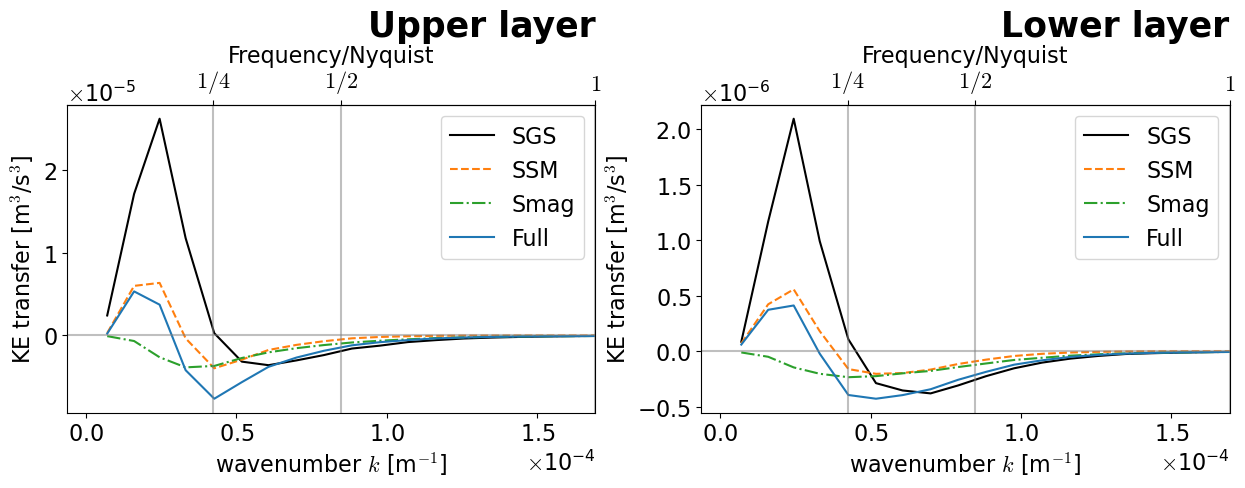

In [14]:
ds.plot_transfer('zelong-True-ssm-True-reduce-1-R6', target='R64_R6_FGR-sqrt6', callback=False)

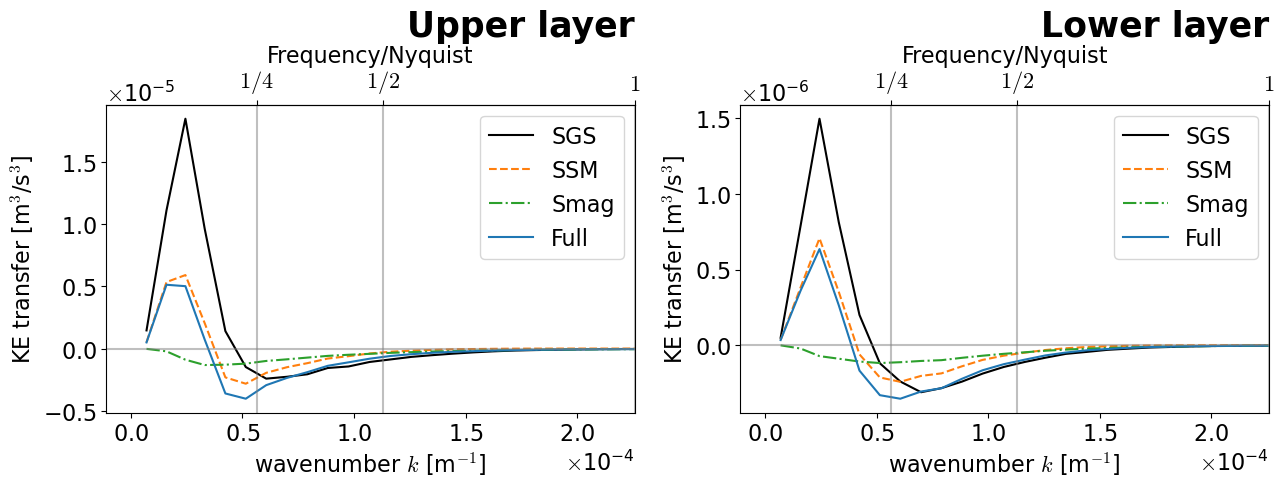

In [16]:
ds.plot_transfer('zelong-False-ssm-True-reduce-1-R8', target='R64_R8_FGR-sqrt6', callback=False)

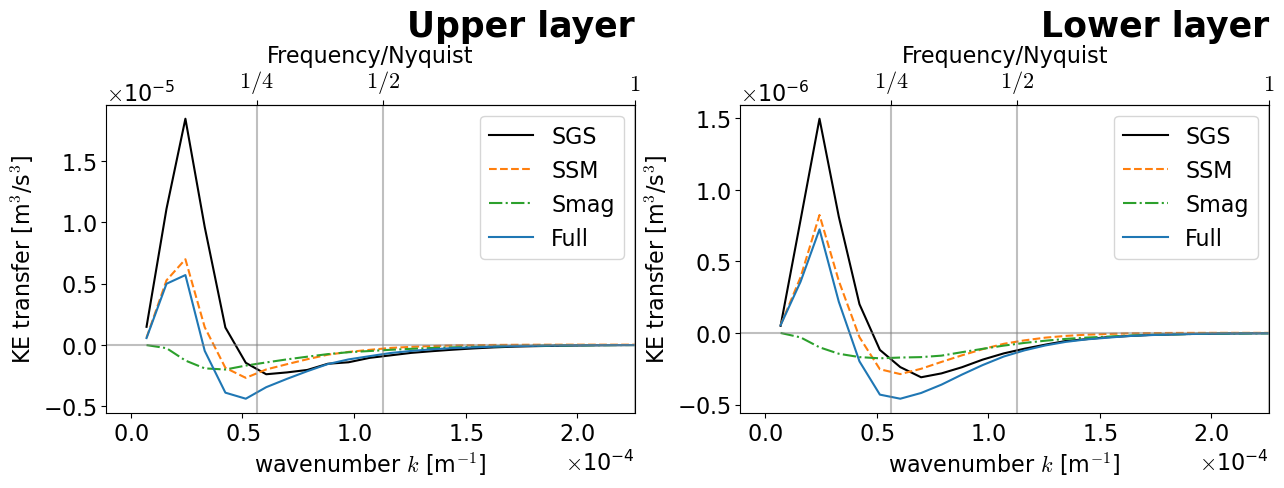

In [17]:
ds.plot_transfer('zelong-True-ssm-True-reduce-1-R8', target='R64_R8_FGR-sqrt6', callback=False)

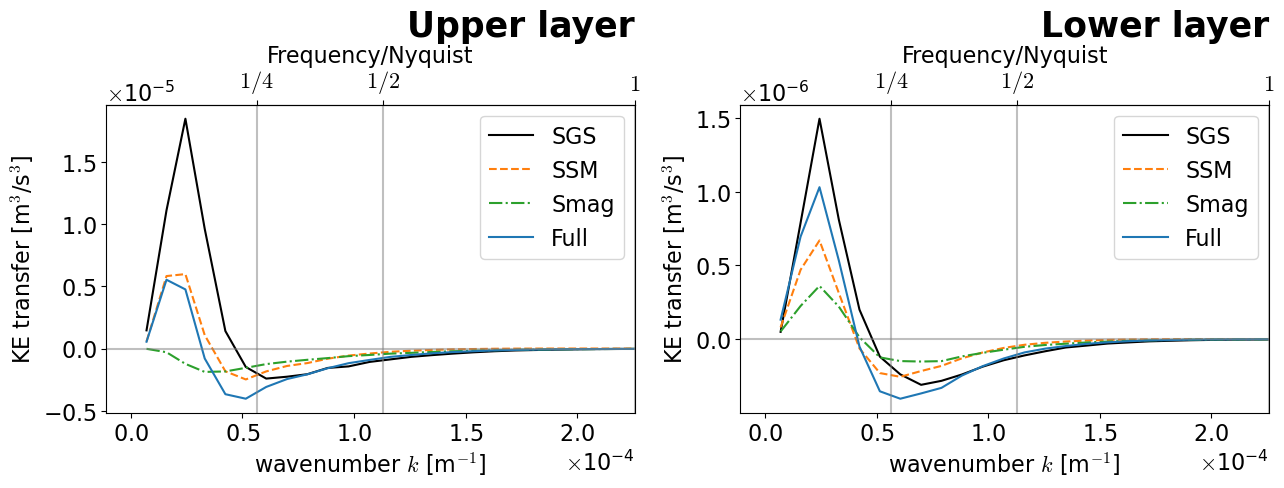

In [19]:
ds.plot_transfer('zelong-True-three-component-reduce-1-R8', target='R64_R8_FGR-sqrt6', callback=False)

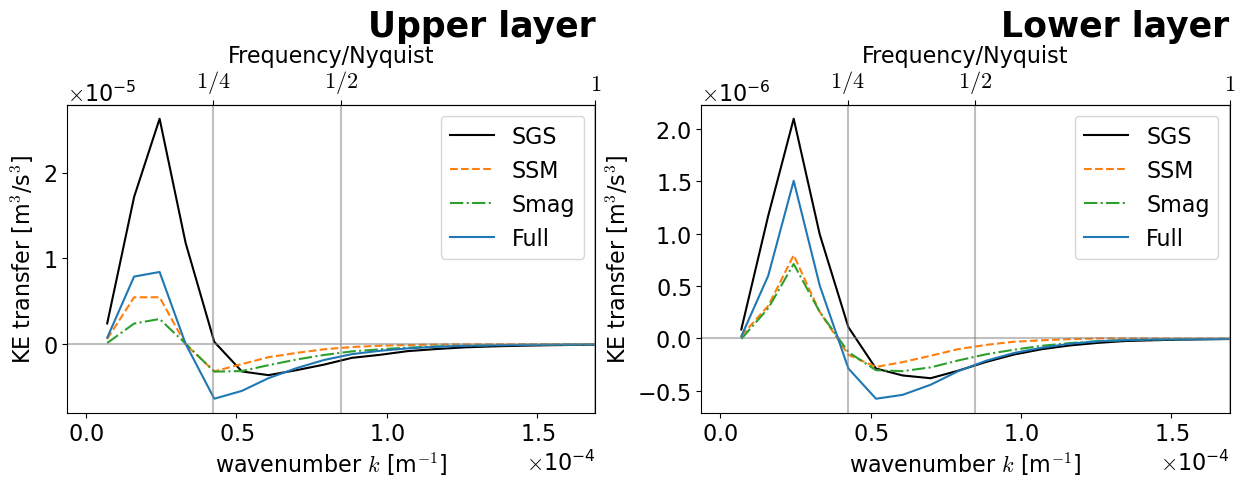

In [20]:
ds.plot_transfer('zelong-True-three-component-reduce-1-R6', target='R64_R6_FGR-sqrt6', callback=False)